In [61]:
import numpy as np
import matplotlib.pyplot as plt

**4.1** Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la freciencia de muestreo mínima necesaria para respresentar la señal y utilice la frecuencia de muestro necesaria para representarla apropiadamente.

La frecuencia de muestreo debe ser de al menos el doble de la frecuencia máxima, que en este caso es 160 Hz. Por lo tanto la frecuencia de muestreo necesaria para representar adecuadamente la señal debe ser 320 Hz o más. En este caso, se tomará 3200 Hz.

Text(0.5, 0, 'Segundos')

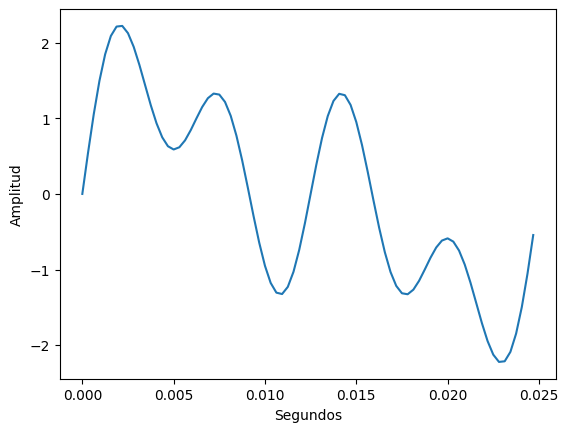

In [62]:
fs=3200 #Hz
time=np.arange(0,0.025,1/fs) #vector de tiempo, periodo 0.025?
frecuencias= [40, 80, 160]
senal=0
for frec in frecuencias:
    x=np.exp(1j*2*np.pi*frec*time) #cos + j sen
    senal+=x
plt.plot(time,np.imag(senal))
plt.ylabel('Amplitud')
plt.xlabel('Segundos')

#en caso de querer modificar las amplitudes, crear vector de amplitudes e ingresar en ciclo

**4.2** Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal. Trabaje con 10 periodos de la señal.

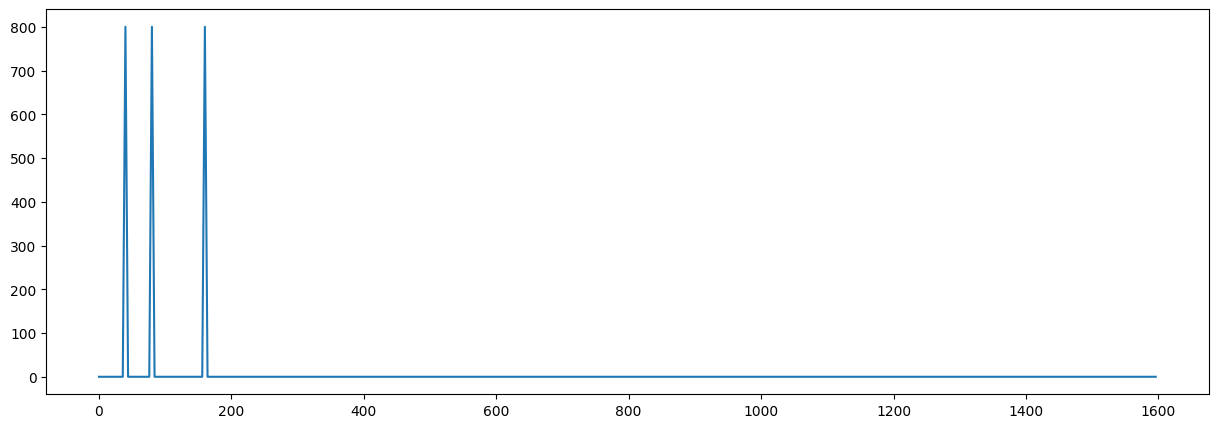

In [63]:
fs=3200 #Hz
time=np.arange(0,0.025*10,1/fs) #vector de tiempo, periodo 0.025?
frecuencias= [40, 80, 160]
senal=0
for frec in frecuencias:
    x=np.exp(1j*2*np.pi*frec*time) #cos + j sen
    senal+=x
Xsenal=np.fft.fft(senal)
nyquist=int(np.ceil(len(Xsenal)/2))
F=np.arange(0,nyquist)*fs/len(Xsenal)
plt.figure(figsize=(15,5))
plt.plot(F,np.abs(Xsenal[0:nyquist]))

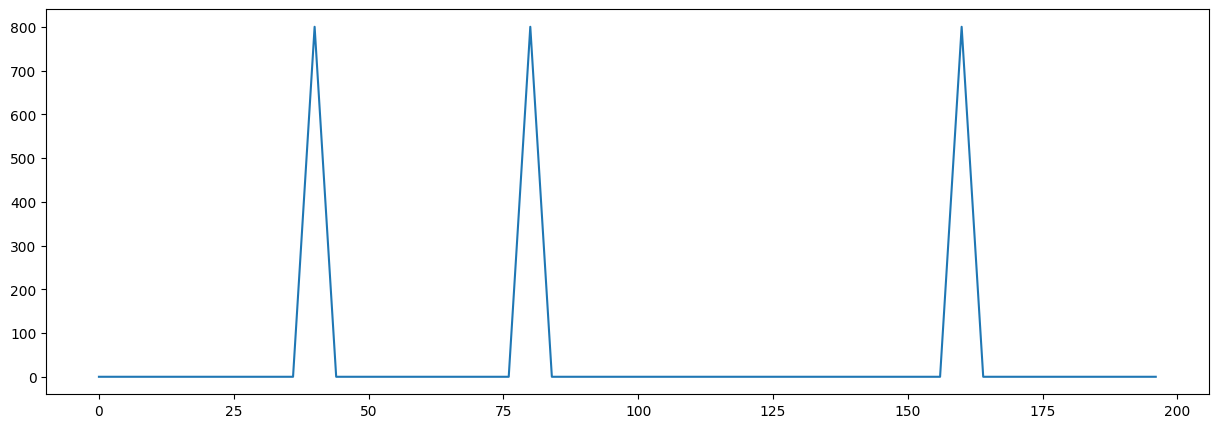

In [64]:
#zoom
plt.figure(figsize=(15,5))
plt.plot(F[0:50],np.abs(Xsenal[0:nyquist])[0:50])

**4.3** Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior.

Existen varias librerias que incluyen funciones para el cálculo de la transformada inversa de fourier como Numpy.fft, Scipy.signal, entre otros. Dado que en el curso se está utlizando la libreria Numpy, la función correspondiente para la transformada inversa de fourier es numpy.fft.ifft

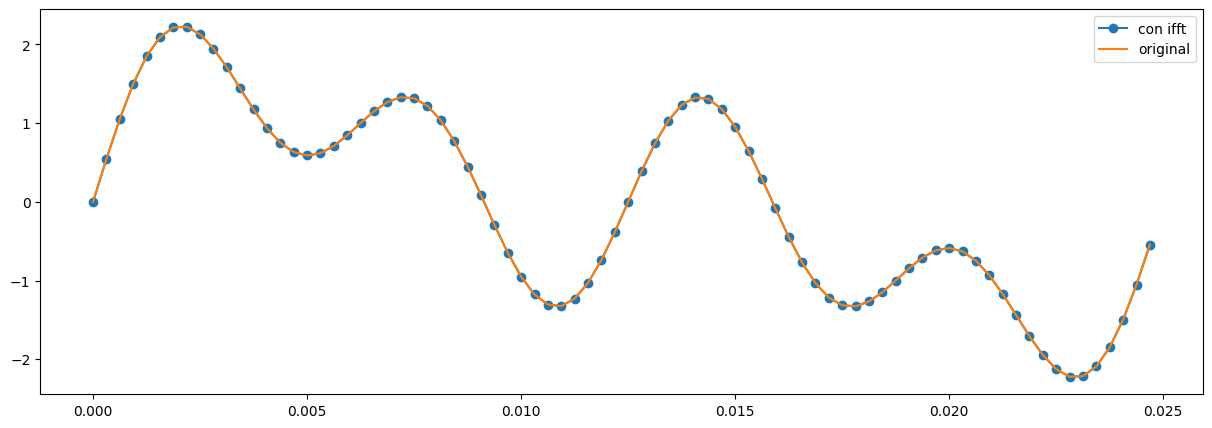

In [65]:
senal_ifft=np.fft.ifft(Xsenal)
plt.figure(figsize=(15,5))
plt.plot(time[0:80],np.imag(senal_ifft)[0:80],marker='o',label='con ifft') #1 periodo
plt.plot(time[0:80],np.imag(senal)[0:80],label='original')
plt.legend()

Cómo puede verse, la señal a la que se le aplico la transformada inversa es equivalente a la señal original

**4.4** ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?  ...

Si, porque una segmentación en frecuencias es equivalente a aplicar un pasa bandas ---> redactar mejor

Extraiga de manera similar cada una de las componentes de la señal

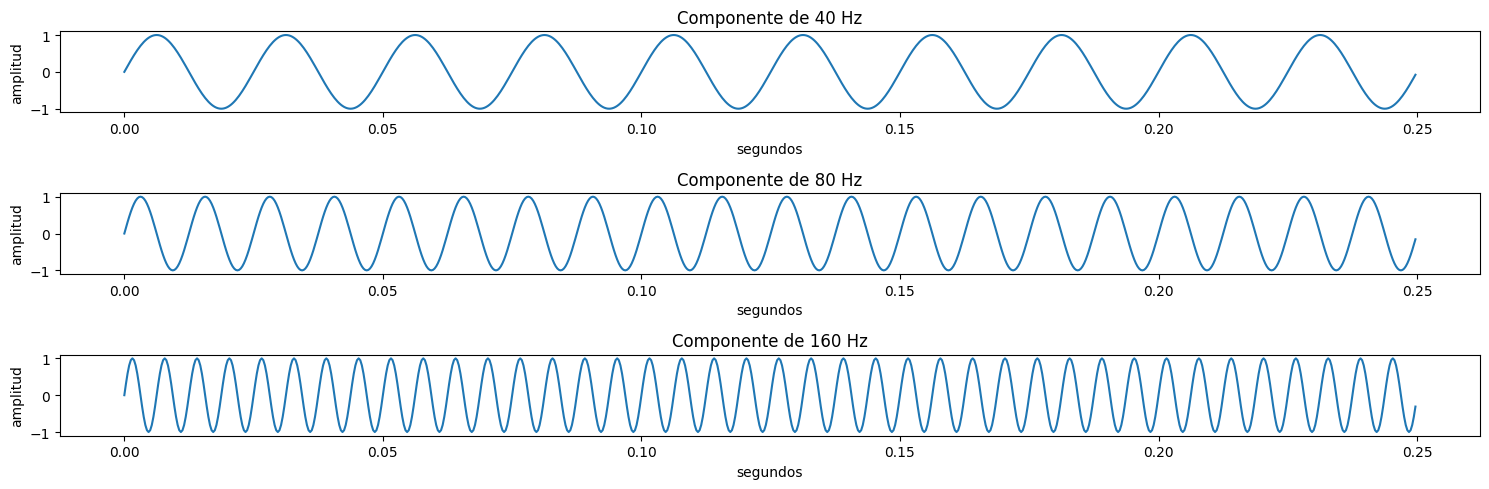

In [66]:
comp1=np.zeros(len(Xsenal))
comp2=np.zeros(len(Xsenal))
comp3=np.zeros(len(Xsenal))
comp1[0:15]=np.abs(Xsenal)[0:15] #40Hz
comp2[15:30]=np.abs(Xsenal)[15:30] #80Hz
comp3[35:45]=np.abs(Xsenal)[35:45] #160Hz
comps= [comp1,comp2,comp3]
plt.figure(figsize=(15,5))
for i in range(0,3):
    plt.subplot(3,1,i+1)
    plt.plot(time,np.imag(np.fft.ifft(comps[i])))
    plt.title(f'Componente de {frecuencias[i]} Hz')
    plt.xlabel('segundos')
    plt.ylabel('amplitud')
plt.tight_layout()

**4.5** El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodograms de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana hanning, y justificar la elección del solapamiento y el ancho de la ventana)

**4.6** Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventana)

In [67]:
#Carga de datos (pacientes seleccionados al azar)
import os
import scipy.io as sio
directorio=os.getcwd()
control_t=sio.loadmat(directorio+'/C012_EP_reposo.mat')['data']
parkinson_t=sio.loadmat(directorio+'/p016_EP_reposo.mat')['data']

In [68]:
#Selección de canal y definición de vectores de tiempo
fs = 1000 #frec muestreo
num_canales = 8 #Channels = 'C3' 'C1' 'CZ' 'C2' 'C4' 'O1' 'OZ' 'O2'
control=np.reshape(control_t,(control_t.shape[0],control_t.shape[1]*control_t.shape[2]),order='F')[2,:] #CZ
parkinson=np.reshape(parkinson_t,(parkinson_t.shape[0],parkinson_t.shape[1]*parkinson_t.shape[2]),order='F')[2,:] #CZ
t_control=np.linspace(0,(control.shape[0])/fs,control.shape[0])
t_parkinson=np.linspace(0,(parkinson.shape[0])/fs,parkinson.shape[0])

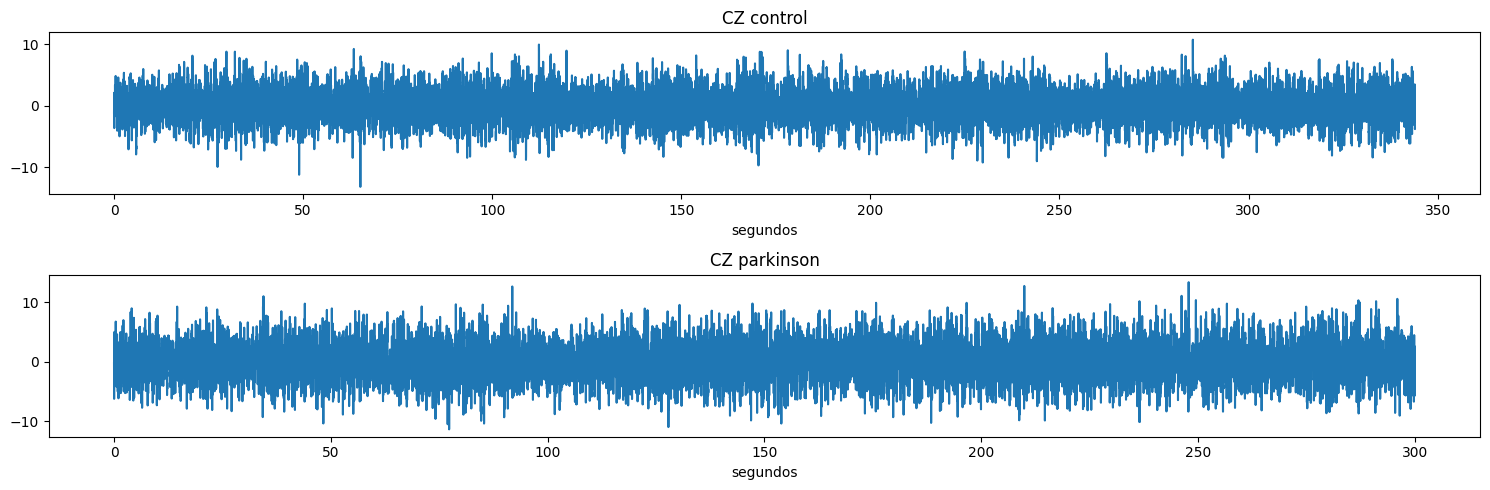

In [69]:
#grafica de señales
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.plot(t_control,control)
plt.title('CZ control')
plt.xlabel('segundos')
plt.subplot(212)
plt.plot(t_parkinson,parkinson)
plt.title('CZ parkinson')
plt.xlabel('segundos')
plt.tight_layout()

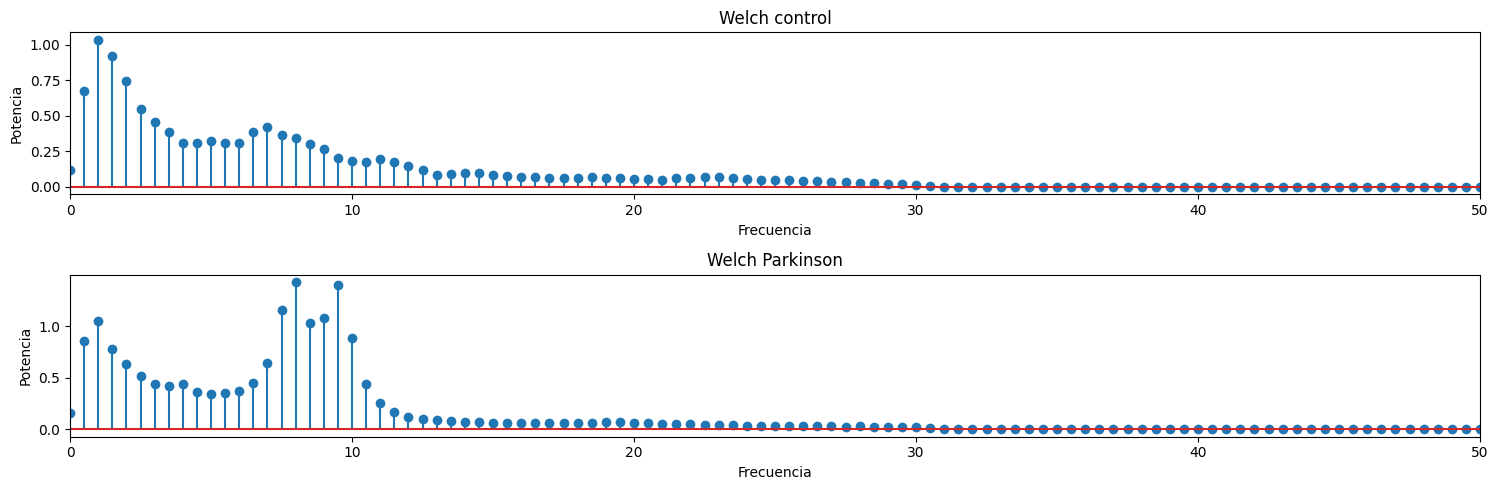

In [70]:
#welch
from scipy.signal import welch as pwelch
nperseg=2000 #ancho de ventana. usado en literatura 1-2 seg
noverlap=int(nperseg/2) #solapamiento de las ventanas. en literatura se suele usar 50-75%
f_control, Pxx_control =pwelch(control, fs, 'hann', nperseg, noverlap) #hann = hanning o Hamming?
f_parkinson, Pxx_parkinson =pwelch(parkinson, fs, 'hann', nperseg, noverlap)
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.stem(f_control,Pxx_control)
plt.title('Welch control')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0,50])
#plt.ylim([0,1.5])
plt.subplot(212)
plt.stem(f_parkinson,Pxx_parkinson)
plt.title('Welch Parkinson')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0,50])
#plt.ylim([0,1.5])
plt.tight_layout()

El ancho de ventana está relacionada con la precisión en tiempo y frecuencia, donde a mayor tamaño hay una mayor precisión en frecuencia dado que a más grande la ventana, mayor es el rango de frecuencias que se incluyen en el espectro. Una ventana de 1 segundo no incluiría frecuencias de 0.1 Hz por ejemplo.
El porcentaje de solapamiento, por su parte suaviza las transiciones entre ventanas, por tanto se puede esperar que a mayor solapamiento haya un menor efecto de artefactos de borde, sin embargo también incrementaría la carga computacional.

En vista de que hay que realizar un análisis comparativo de los espectros, se podría seleccionar un ancho de ventana grande para una mejor precisión en frecuencia, sin embargo, en la literatura se ha mencionado que para el estudio de pacientes con enfermedad de Parkinson y sanos se ve una diferencia en las frecuencias de 10-15Hz, así que para reducir carga computacional se puede escoger un ancho de ventana que permita una correcta toma de estas frecuencias, no obstante, para este caso (sólo dos señales) no es requerido.

**Análisis comparativo**

Se puede observar gráficamente en el espectro que hay una diferencia en la banda de frecuencia entre 5 y 15 Hz, mientras que en el resto de las frecuencias se observa un comportamiento similar. Esto puede sugerir que en pacientes con parkinson, la actividad de las ondas alfa podría ser mayor. Por lo tanto se procede a realizar el análisis en el rango de frecuencias correspondientes a alfa (7-13 Hz).

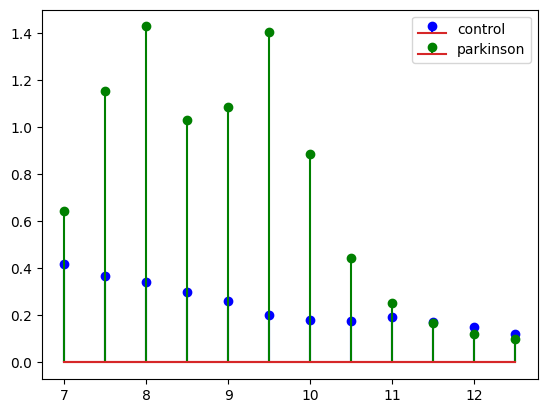

In [71]:
from scipy import stats
#np.where(f_parkinson == 15)
alpha=0.05
wcontrol=Pxx_control[14:26]
wparkinson=Pxx_parkinson[14:26]
wtime=f_control[14:26]
#graficas de segmentos
plt.stem(wtime,wcontrol,'b',markerfmt='bo',label='control')
plt.stem(wtime,wparkinson,'g',markerfmt='go',label='parkinson')
plt.legend()


In [72]:
#supuesto de supuesto de normalidad
stat, p_value = stats.shapiro(wcontrol)
if p_value > alpha:
    print('Los datos de control distribuyen normal')
else:
    print('Los datos de control no distribuyen normal')
#para parkinson
stat, p_value = stats.shapiro(wparkinson)
if p_value > alpha:
    print('Los datos de parkinson distribuyen normal')
else:
    print('Los datos de parkinson no distribuyen normal')

Los datos de control distribuyen normal
Los datos de parkinson distribuyen normal


Dado que ambos conjuntos de datos cumplen con el supuesto de normalidad entonces se realiza la prueba t de student para determinar si pueden ser considerados como diferentes.

In [73]:
statistic, p_value = stats.ttest_ind(wcontrol,wparkinson)
if p_value > alpha:
    print("No hay evidencia suficiente para rechazar la hipótesis nula")
else:
    print("Se rechaza la hipótesis nula en favor de la hipótesis alternativa")

Se rechaza la hipótesis nula en favor de la hipótesis alternativa


Como en la prueba t de student se rechazó la hipótesis nula, entonces puede decirse que las medias de las ondas alfa del paciente control y el paciente parkinson son diferentes. Esto puede ser un indicio de que en los pacientes de parkinson se registra una mayor actividad de ondas alfa que en pacientes normales.

Bibliografía:
- Sun, P. (2014). Comparison of STFT and Wavelet Transform in Timefrequency Analysis. University of Gavle.
- Mathematics and Signal Processing for Biomechanics. Tomado de: https://www1.udel.edu/biology/rosewc/kaap686/notes/windowing.html#:~:text=The%20first%20side%20lobe%20of,is%20better%20in%20that%20regard
- https://d1wqtxts1xzle7.cloudfront.net/67471983/IJEET_12_05_008-libre.pdf?1622454030=&response-content-disposition=inline%3B+filename%3DA_NOVEL_APPROACH_FOR_THE_EARLY_DETECTION.pdf&Expires=1713730889&Signature=YpYcb7gGKouWHUPUpUunVkCZj-nsnBv2PKegnFl31AopNk4FRu34R8qjX8DLXkATuZLwRHtexI0bMa-hqVCrT1hB65jJVjKQuUhU0CbSGsus5435rYqtUibrBEbUu29d5t6LVjAHk0AruNxl~doOvnHbHIzY5lYWTsh2dITTGXEGrRkGKxOQpdLwDvRmPGIMpkg8tSHWNsOiA~ZjMg-~cGio0wd9Z97IEtvZPB6kofOYpqcuXf0Kr-1xqvu2kqFfl4AIIDGUyQSp8Y~AI1PDSdLGZ~YxWBJ2UQm1byILQWumm2WN5bPrim4E6ga7qt6A3BAJW3-3MeXyGlQA7Mo20g__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA
